<a href="https://colab.research.google.com/github/michaelajao/Reinforcement-learning-stock-trading-/blob/master/stock_trading_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install duka

  Created wheel for duka: filename=duka-0.2.0-cp36-none-any.whl size=10720 sha256=2c1cacf2bbeb1c8eaf4a0a54f0b370347e3711f5c4b9b9951ea895bf4d75104b
  Stored in directory: /root/.cache/pip/wheels/5b/09/39/a810b7e2e8cca6011a104cfe28d798d21ccc6b520874634c12
Successfully built duka


In [ ]:
pip install mpl_finance

In [ ]:
pip install tensorflow

In [ ]:
import duka.app.app as import_ticks_method
from duka.core.utils import TimeFrame
import datetime

import os
import numpy as np
import pandas as pd
import itertools
import sklearn
import keras
import time

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc


# start_date = datetime.date(2018,1,1) 
# end_date = datetime.date(2018,2,1)
# Assets = ['EURUSD']

# import_ticks_method(Assets, start_date, end_date, 1, TimeFrame.TICK, ".", True)


[####################################################################################################] 100%  Left : 0:00:00  

In [ ]:
%matplotlib inline
# %reload_ext autoreload
# %autoreload 2
# %matplotlib notebook

In [ ]:
tick_data = pd.read_csv('/content/EURUSD-2018_01_01-2018_02_01.csv', index_col=['time'], parse_dates=['time'] )
print(tick_data)  

                             ask      bid  ask_volume  bid_volume
time                                                             
2018-01-01 22:00:08.661  1.20143  1.20102      750000     1500000
2018-01-01 22:00:08.895  1.20148  1.20102     1500000     1500000
2018-01-01 22:00:10.634  1.20147  1.20102      750000     1500000
2018-01-01 22:00:11.223  1.20148  1.20102     1500000     1500000
2018-01-01 22:00:29.530  1.20145  1.20102      750000     1500000
...                          ...      ...         ...         ...
2018-02-01 23:59:57.565  1.25106  1.25104     3820000     3560000
2018-02-01 23:59:57.618  1.25109  1.25104     1570000     4690000
2018-02-01 23:59:57.773  1.25109  1.25106     1120000     1250000
2018-02-01 23:59:58.351  1.25109  1.25105     1120000     1690000
2018-02-01 23:59:59.443  1.25109  1.25105     1120000     2060000

[2437301 rows x 4 columns]


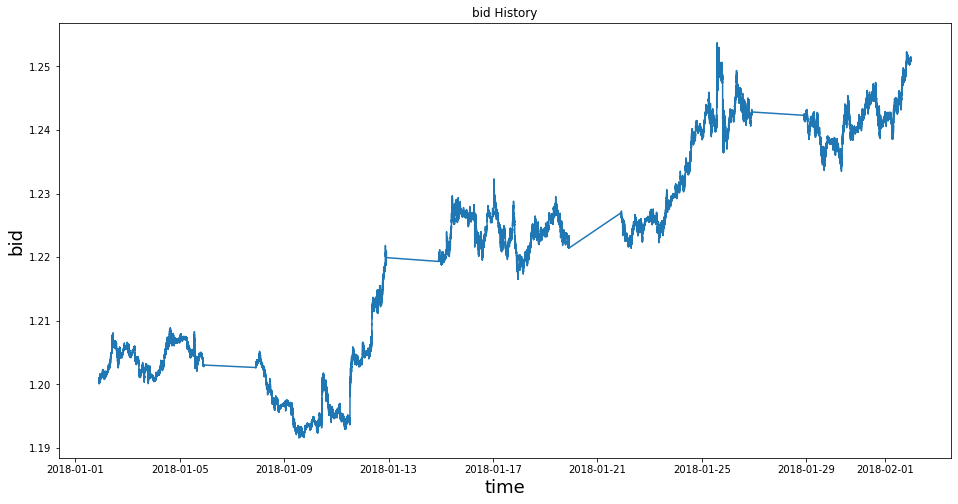

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('bid History')
plt.plot(tick_data['bid'])
plt.xlabel('time',fontsize=18)
plt.ylabel('bid',fontsize=18)
plt.show()

In [ ]:
# this code converts ticks data to ohlc for intervals of 60seconds
def convert_ticks_to_ohlc(df, df_columns, timeframe):
  data_frame = df[df_columns].resample(timeframe).ohlc()
  return data_frame

data_ask = convert_ticks_to_ohlc(tick_data, "bid", "90000L")
data_ask = data_ask.dropna()
data_ask

,open,high,low,close
time,,,,
2018-01-01 22:00:00,1.20102,1.20102,1.20097,1.20099
2018-01-01 22:01:30,1.20090,1.20090,1.20007,1.20025
2018-01-01 22:03:00,1.20024,1.20050,1.20024,1.20032
2018-01-01 22:04:30,1.20031,1.20052,1.20031,1.20052
2018-01-01 22:06:00,1.20052,1.20069,1.20030,1.20054
...,...,...,...,...
2018-02-01 23:52:30,1.25107,1.25154,1.25107,1.25148
2018-02-01 23:54:00,1.25148,1.25149,1.25117,1.25118
2018-02-01 23:55:30,1.25117,1.25118,1.25099,1.25113


In [ ]:
tick_data.describe()

,ask,bid,ask_volume,bid_volume
count,2.437301e+06,2.437301e+06,2.437301e+06,2.437301e+06
mean,1.223794e+00,1.223762e+00,2.494663e+06,2.447136e+06
std,1.702975e-02,1.702771e-02,5.094850e+06,2.506601e+06
min,1.191580e+00,1.191560e+00,1.000000e+05,1.000000e+05
25%,1.206090e+00,1.206060e+00,1.120000e+06,1.120000e+06
50%,1.225080e+00,1.225060e+00,1.690000e+06,1.680000e+06
75%,1.240360e+00,1.240310e+00,3.070000e+06,3.000000e+06
max,1.253750e+00,1.253730e+00,4.176750e+09,7.905400e+08


In [ ]:
data_ask.describe()

,open,high,low,close
count,22160.000000,22160.000000,22160.000000,22160.000000
mean,1.220673,1.220803,1.220545,1.220675
std,0.017088,0.017117,0.017059,0.017088
min,1.191650,1.191830,1.191560,1.191650
25%,1.204278,1.204380,1.204180,1.204270
50%,1.223620,1.223750,1.223460,1.223610
75%,1.238010,1.238110,1.237872,1.238000
max,1.253360,1.253730,1.252140,1.253400


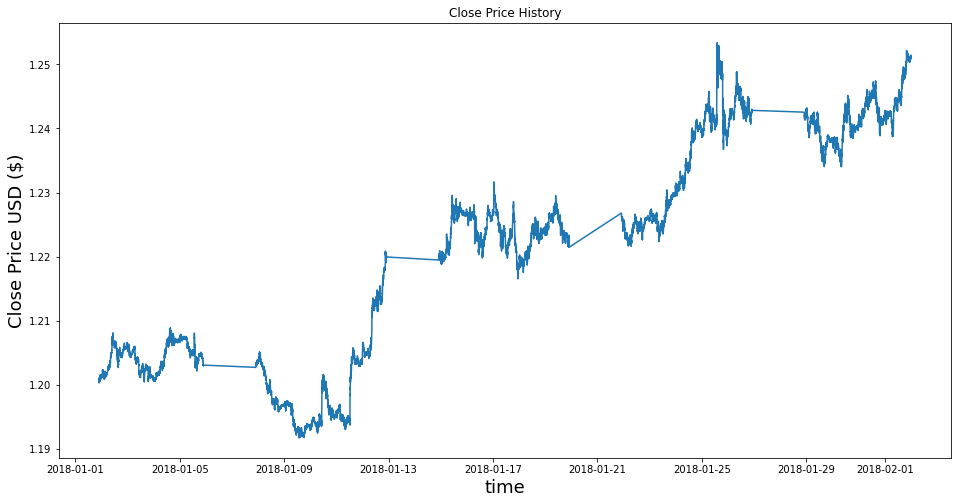

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data_ask['close'])
plt.xlabel('time',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
def graph_data_ohlc(dataset):
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    closep=dataset[:,[3]]
    highp=dataset[:,[1]]
    lowp=dataset[:,[2]]
    openp=dataset[:,[0]]
    date=range(len(closep))

    x = 0
    y = len(date)
    ohlc = []
    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x]
        ohlc.append(append_me)
        x+=1
    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    plt.xlabel('Candle')
    plt.ylabel('Price')
    plt.title('Candlestick sample representation')

    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

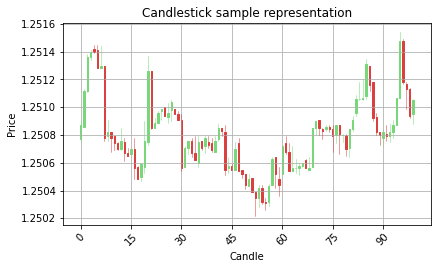

In [ ]:
graph_data_ohlc(data_ask.tail(100).values)

## This is the analysis using the lstm model which is an artificial recurrent neural network


In [ ]:
# split the data into train and test set
train, test = train_test_split(data_ask, test_size=0.3, random_state=42, shuffle=True)

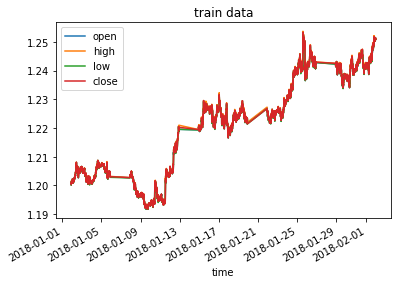

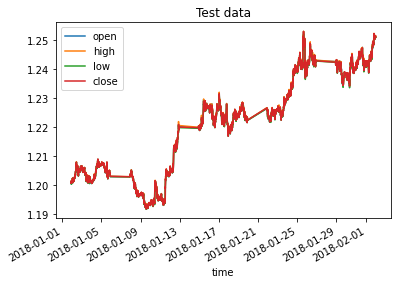

In [ ]:
train.plot(title = 'train data')
test.plot(title = 'Test data')

In [ ]:
def create_training_dataset(dataset, look_back, time_ahead):
    '''
    Converts an array of values into a dataset matrix of X and Y for a sequential model
    '''
    dataX, dataY = [], []

    for i in range(len(dataset) - look_back - time_ahead + 1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back + time_ahead - 1, 0])

    dataX = np.array(dataX)
    dataX = np.reshape(dataX, (dataX.shape[0], 1, dataX.shape[1]))
    dataY = np.array(dataY)

    return dataX, dataY

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
epoch = 20
time_ahead = 1
look_back = 500
def Create_model():
    print("Building model with:", 'LSTM')

    
    # Train on last 500 prices and try to predict the next price
    look_back = 500
    units = 50
    
    model_name = 'LSTM'
    # Create the model
    model = Sequential()
    model.add(LSTM(units, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.add(Activation('linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    

    return model
    

In [ ]:
model = Create_model()
model.summary()

Building model with: LSTM
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                110200    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 110,251
Trainable params: 110,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("C:\\Users\\ajaoo\\New folder\\logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor= "loss",
                                                  patience=3) # stops after 3 rounds of no improvements

In [ ]:
# Check again if GPU is available (otherwise computing will take a looooonnnnggggg time)
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESS!!!!)


In [ ]:
# Create dataset from the DataFrame and normalise
dataset = train['close'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1, 1)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# Create X, Y for training
trainX, trainY = create_training_dataset(dataset, look_back=look_back, time_ahead=time_ahead)

In [ ]:
# Create a scaler and fit
test_scaler = MinMaxScaler(feature_range=(0, 1))
test_scaler.fit(test['close'].values.reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = Create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=trainX,
            y=trainY,
            batch_size=1,
            verbose=0,
            epochs=epoch,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
model = train_model()

Building model with: LSTM


In [ ]:
# a function to predict
def predict(values):
    values = test_scaler.transform(values.reshape(-1, 1))
    values = np.reshape(values, (1, 1, look_back))
    prediction = model.predict(values)
    prediction = prediction.reshape(-1, 1)
    return test_scaler.inverse_transform(prediction)

In [ ]:
# Put predictions from model into the dataframe with the test prices
test['prediction_next'] = test['close'].rolling(window=look_back).apply(predict, raw=True)
test['prediction'] = test['prediction_next'].shift(time_ahead)
test.dropna(subset=['prediction_next'], inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

In [ ]:
# RMSE
rmse = np.sqrt(
    mean_squared_error(
        y_true=test.dropna()['close'].values,
        y_pred=test.dropna()['prediction'].values
    )
)
print('RMSE: {0}'.format(rmse))

RMSE: 0.017487171148411064


In [ ]:
# add columns for price direction and predicted direction
test['next_direction'] = np.where(test['close'] > test['close'].shift(-1), -1, 1)
test['next_direction_prediction'] = np.where(test['prediction_next'] > test['close'], 1, -1)
test['correct'] = test['next_direction_prediction'] == test['next_direction']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# How often does the model predict the correct price change direction
test['correct'].value_counts()

True     4563
False    1586
Name: correct, dtype: int64

In [ ]:

# Create a column for the position we should take
test['position'] = test['prediction_next']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


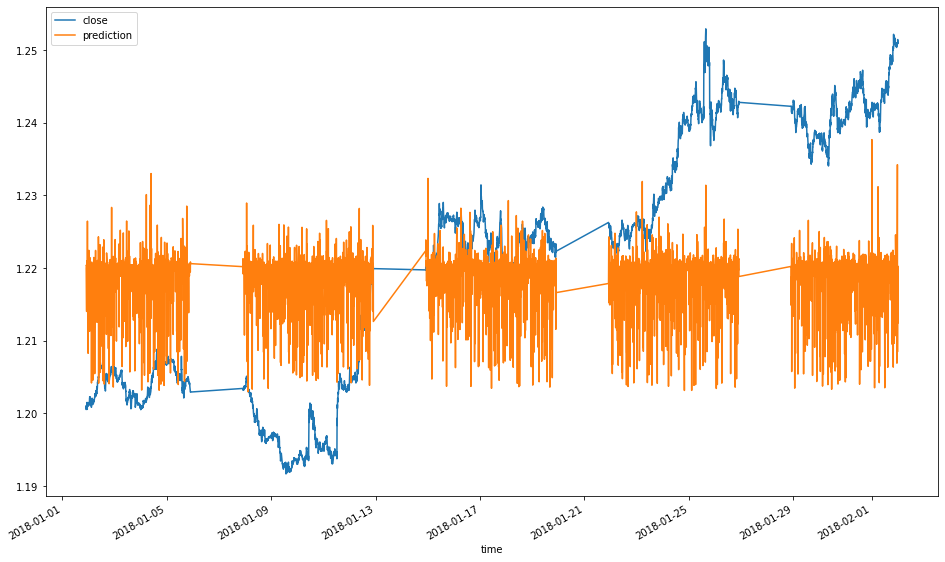

In [ ]:
test[['close', 'prediction']].plot(figsize=(16, 10))

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=c015e8e2babda671e8dc4ee355d3d69c306de6d1daafdac1d9ae716077a93453
  Stored in directory: /tmp/pip-ephem-wheel-cache-1cbaxa4u/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
df_full = yf.download("GOOG", start="2017-01-01", end="2019-11-30")

df_full.head()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300
2017-01-04,788.359985,791.340027,783.159973,786.900024,786.900024,1073000
2017-01-05,786.080017,794.479980,785.020020,794.020020,794.020020,1335200
2017-01-06,795.260010,807.900024,792.203979,806.150024,806.150024,1640200
2017-01-09,806.400024,809.966003,802.830017,806.650024,806.650024,1274600


In [ ]:
from collections import deque
import random

df= data_ask.copy()
name = 'Q-learning agent'

class Agent:
    def __init__(self, state_size, window_size, trend, skip, batch_size):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.action_size = 3
        self.batch_size = batch_size
        self.memory = deque(maxlen = 1000)
        self.inventory = []

        self.gamma = 0.95
        self.epsilon = 0.5
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.999

        tf.reset_default_graph()
        self.sess = tf.InteractiveSession()
        self.X = tf.placeholder(tf.float32, [None, self.state_size])
        self.Y = tf.placeholder(tf.float32, [None, self.action_size])
        feed = tf.layers.dense(self.X, 256, activation = tf.nn.relu)
        self.logits = tf.layers.dense(feed, self.action_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.GradientDescentOptimizer(1e-5).minimize(
            self.cost
        )
        self.sess.run(tf.global_variables_initializer())

    def act(self, state):
        if random.random() <= self.epsilon:
            return random.randrange(self.action_size)
        return np.argmax(
            self.sess.run(self.logits, feed_dict = {self.X: state})[0]
        )
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])

    def replay(self, batch_size):
        mini_batch = []
        l = len(self.memory)
        for i in range(l - batch_size, l):
            mini_batch.append(self.memory[i])
        replay_size = len(mini_batch)
        X = np.empty((replay_size, self.state_size))
        Y = np.empty((replay_size, self.action_size))
        states = np.array([a[0][0] for a in mini_batch])
        new_states = np.array([a[3][0] for a in mini_batch])
        Q = self.sess.run(self.logits, feed_dict = {self.X: states})
        Q_new = self.sess.run(self.logits, feed_dict = {self.X: new_states})
        for i in range(len(mini_batch)):
            state, action, reward, next_state, done = mini_batch[i]
            target = Q[i]
            target[action] = reward
            if not done:
                target[action] += self.gamma * np.amax(Q_new[i])
            X[i] = state
            Y[i] = target
        cost, _ = self.sess.run(
            [self.cost, self.optimizer], feed_dict = {self.X: X, self.Y: Y}
        )
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        return cost
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
                
                
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
        
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.act(state)
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                self.memory.append((state, action, invest, 
                                    next_state, starting_money < initial_money))
                state = next_state
                batch_size = min(self.batch_size, len(self.memory))
                cost = self.replay(batch_size)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [ ]:
close = data_ask.close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip, 
              batch_size = batch_size)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

TypeError: ignored